### Traveling merchant problem solved with ant algorithm
This code aims to solve traveling merchant problem using ant algorithm, we take N random points from 2 dimensional X, Y space where X and Y take values from 0 to 100. Then using ant algorithm we create shortest path connecting all the points where every point can be visited only once.

Algorithm works in such a way that ants start from different points and try do determine the best path, it chooses next point to travel to based on distance to it and pheromones left by other ants at this path in different iterations. This way we create the most 'popular' paths ousing pheromones, they tend to be more efficient. Alpha and Beta parameters influence how Based ants are when choosing next point which they should visit, beta accounts for influence of distance between points and alpha changes influence of pheromones left at path. 
Ideally we should pick number of ants equal to count of points in given example, then each ant can have it own unique startpoint to unique localizing the function.    

In [6]:
#importing necessary libraries
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
#defining ANT class to store visited points and total distance traveled 
class Ant:
    def __init__(self, start_point):
        self.visited = [start_point]
        self.total_distance = 0.0

# calculating distance between 2 given points
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# calculating total distance for all the points, will be used to calculate total distance for the best path
def calculate_total_distance(points):
    total_distance = 0.0
    for i in range(len(points) - 1):
        total_distance += distance(points[i], points[i+1])
    return total_distance

# defining ant colony optimization function which takes 6 arguments
# num ants - how many ants will be used in algorithm
# points - points coordintates which we will connect using algorithm
# evaporation rate - rate at which pheromones evaporate
# num_iterations - number of iterations
# alpha - determines influence of pheromones on which point to visit next
# beta - determines influence of distance on which point to visit next


def ant_colony_optimization(points, num_ants, num_iterations, evaporation_rate, alpha, beta):
    num_points = len(points)
    point_indices = {point: i for i, point in enumerate(points)}
    # checking number of points and creating dicts with a list of points

    best_path = None
    best_distance = float('inf')
    # creating vars to which we will assign values later

    pheromone = [[1.0 for _ in range(num_points)] for _ in range(num_points)]
    # setting pheromone value to 1 as base for every possible path 

    for iteration in range(num_iterations):
        ants = [Ant(random.choice(points)) for _ in range(num_ants)]
        # picking random start point for every ant

        for ant in ants:
            while len(ant.visited) < num_points:
                current_point = ant.visited[-1]
                unvisited_points = [point for point in points if point not in ant.visited]
                # run a loop until ant has visited all points (while loop definition), update current position and points to be visited

                current_index = point_indices[current_point]
                unvisited_indices = [point_indices[point] for point in unvisited_points]
                # set current index (current ant location) and create a list of unvisited indicies

                probabilities = []
                # create empty list to store probabilities of visiting points

                for index in unvisited_indices:
                    pheromone_level = pheromone[current_index][index]
                    dist = distance(current_point, points[index])
                    probability = pheromone_level**alpha * (1.0 / dist)**beta
                    probabilities.append((index, probability))
                # assign pheromone level to unvisited indicies, calculating distance to other points, calculating probability 
                # to visit any given point and append it to probabilities list

                total_probabilities = sum(probability for _, probability in probabilities)
                probabilities = [(index, probability / total_probabilities) for index, probability in probabilities]
                # sum all probabilities and then calculate probability for visiting every index

                next_index = random.choices([index for index, _ in probabilities], [probability for _, probability in probabilities])[0]
                next_point = points[next_index]
                # choose next point from index with weights equaling to ptobability
                
                ant.visited.append(next_point)
                ant.total_distance += distance(current_point, next_point)
                # add visited point to visited points in ant class and add distance traveled between points to ant class distance
            
            ant.total_distance += distance(ant.visited[-1], ant.visited[0])
            # add visited point to visited points in ant class and add distance traveled between points to ant class distance

            if ant.total_distance < best_distance:
                best_distance = ant.total_distance
                best_path = ant.visited[:]
            # if statement - if ant class distance is better than current best_distance assign it as next best_distance and change best_path to ant.visited 

        for i in range(num_points):
            for j in range(num_points):
                if i != j:
                    pheromone[i][j] *= evaporation_rate
        # account for evaporation_rate of pheromones

        for ant in ants:
            for i in range(len(ant.visited) - 1):
                current_index = point_indices[ant.visited[i]]
                next_index = point_indices[ant.visited[i+1]]
                pheromone[current_index][next_index] += 1.0 / ant.total_distance
        # spread pheromones on paths traveled by ants

    return best_path
    # return best_path created by function

In [8]:
# setting number of points, and draving that number of random points on our X, Y plain 
n_points = 40
points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(n_points)]

In [9]:
# Seting sample parameters for our ant algorithm
num_ants = 40
num_iterations = 20
evaporation_rate = 0.5
alpha = 4
beta = 2

In [10]:
# finding best path to connect our points
best_path = ant_colony_optimization(points, num_ants, num_iterations, evaporation_rate, alpha, beta)

# printing the shortest path and the length of it
print("Shortest path:", best_path)
print("Path length:", calculate_total_distance(best_path))

Shortest path: [(37, 10), (39, 4), (34, 1), (27, 4), (21, 8), (12, 29), (10, 35), (35, 58), (21, 66), (17, 73), (2, 76), (36, 77), (41, 81), (39, 83), (43, 89), (46, 92), (59, 71), (62, 66), (68, 61), (73, 82), (86, 86), (88, 89), (93, 82), (97, 66), (89, 63), (88, 38), (76, 28), (88, 29), (91, 25), (85, 19), (84, 7), (70, 20), (62, 19), (49, 18), (53, 35), (37, 34), (36, 40), (35, 32), (36, 31), (33, 15)]
Path length: 478.8289689860814


In [12]:
### function which can be used to measure path generated by ant algorithm with different parameters, thanks to using average of N paths results are more consistent
def path_length_comparing(n):
    lst=[]
    for i in range(10):
        best_path = ant_colony_optimization(points, num_ants, num_iterations, evaporation_rate, alpha, beta)
        x=calculate_total_distance(best_path)
        lst.append(x)

    def Average(lst):
        return sum(lst) / len(lst)
    average = Average(lst)

    # Printing average of the list containing our N paths
    #print("Average length of path for given parameters based on",n ,'iterations is' , round(average, 0))
    return(round(average,0))

481.0

In [14]:
# call of function defined in cell above, we take average length of path on n iterations
n=10
print('average length of',n,'paths is', path_length_comparing(n))

average length of 10 paths is 471.0


Shortest path: [(37, 10), (39, 4), (34, 1), (27, 4), (21, 8), (12, 29), (10, 35), (35, 58), (21, 66), (17, 73), (2, 76), (36, 77), (41, 81), (39, 83), (43, 89), (46, 92), (59, 71), (62, 66), (68, 61), (73, 82), (86, 86), (88, 89), (93, 82), (97, 66), (89, 63), (88, 38), (76, 28), (88, 29), (91, 25), (85, 19), (84, 7), (70, 20), (62, 19), (49, 18), (53, 35), (37, 34), (36, 40), (35, 32), (36, 31), (33, 15)]
Path length: 478.8289689860814


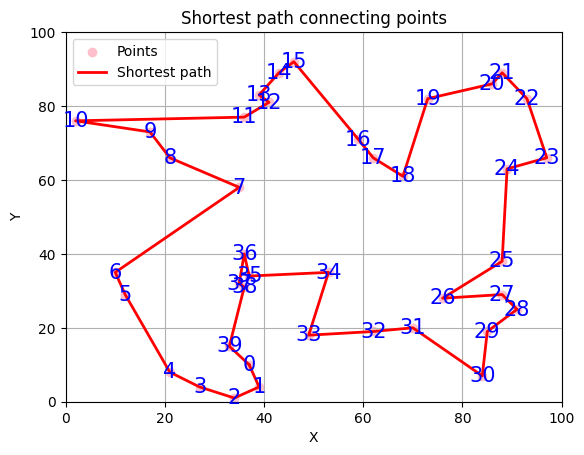

In [16]:
# function plotting points and connecting them with shortest path established earlier, enumarating them in move order
print("Shortest path:", best_path)
print("Path length:", calculate_total_distance(best_path))
plt.figure()
plt.scatter(*zip(*points), color='pink', label='Points')
plt.plot(*zip(*best_path, best_path[0]), color='red', linewidth=2, label='Shortest path')
for i in range(len(best_path)):
    point = best_path[i]
    plt.text(point[0], point[1], str(i), color='blue', fontsize=15, ha='center', va='center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Shortest path connecting points')
plt.legend()
plt.grid(True)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()